<a href="https://colab.research.google.com/github/lucastbeloni/Sistema-de-Informacoes-sobre-Mortalidade/blob/main/SIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
#import basedosdados as bd

In [2]:
df = pd.read_csv('municipio_causa_idade_sexo_raca.csv')

In [4]:
df.head()

,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos
0,1996,AC,1200000,R99,NaN,1.0,NaN,1
1,1996,AC,1200000,V892,25.0,1.0,NaN,1
2,1996,AC,1200000,X959,NaN,1.0,3.0,1
3,1996,AC,1200000,X959,NaN,1.0,NaN,1
4,1996,AC,1200013,A419,71.0,2.0,NaN,1


In [5]:
df = df[df.duplicated('causa_basica', keep=False)] # seleciona nomes que aparecem mais de uma vez

total_by_state = df.groupby('sigla_uf').numero_obitos.sum() # agrupa o total por estado
df = df.merge(total_by_state, on='sigla_uf', suffixes=('', '_total_by_state')) # une os dados com total por estado

df['freq_per_100k'] = 100_000 * df.numero_obitos / df.numero_obitos_total_by_state # cria o total por estado por 100k pessoas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22617834 entries, 0 to 22617833
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   ano                           int64  
 1   sigla_uf                      object 
 2   id_municipio                  int64  
 3   causa_basica                  object 
 4   idade                         float64
 5   sexo                          float64
 6   raca_cor                      float64
 7   numero_obitos                 int64  
 8   numero_obitos_total_by_state  int64  
 9   freq_per_100k                 float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.9+ GB


In [7]:
#msn.matrix(df)
#plt.show()

In [10]:
df.isnull().sum()


ano                                   0
sigla_uf                              0
id_municipio                          0
causa_basica                          0
idade                            106549
sexo                               1443
raca_cor                        3037005
numero_obitos                         0
numero_obitos_total_by_state          0
freq_per_100k                         0
dtype: int64

In [11]:
#msn.bar(df)

#plt.show()

In [12]:
df.isnull().sum()/df.shape[0]

ano                             0.000000
sigla_uf                        0.000000
id_municipio                    0.000000
causa_basica                    0.000000
idade                           0.004711
sexo                            0.000064
raca_cor                        0.134275
numero_obitos                   0.000000
numero_obitos_total_by_state    0.000000
freq_per_100k                   0.000000
dtype: float64

In [13]:
df['sigla_uf'].value_counts()


SP    4881041
MG    2569423
RJ    2131270
RS    1644376
BA    1550220
PR    1389595
PE    1179783
CE     917372
SC     755833
GO     685302
PA     616838
MA     559450
PB     484581
ES     453180
AL     363996
RN     363489
PI     333962
MT     320198
MS     301155
AM     244023
SE     241696
DF     189400
RO     152549
TO     137050
AC      65659
AP      48838
RR      37555
Name: sigla_uf, dtype: int64

In [14]:
df[['numero_obitos', 'sigla_uf']].groupby('sigla_uf').sum().sort_values('numero_obitos', ascending=False)

,numero_obitos
sigla_uf,
SP,6203939
RJ,2952111
MG,2754106
RS,1823476
BA,1721201
PR,1520563
PE,1332508
CE,1052436
SC,794724


In [15]:
state2abbr = {
    'AC': 'BR.AC', 'AL': 'BR.AL', 'AP': 'BR.AP',
    'AM': 'BR.AM', 'BA': 'BR.BA', 'CE': 'BR.CE',
    'DF': 'BR.DF', 'ES': 'BR.ES',
    'GO': 'BR.GO', 'MA': 'BR.MA', 'MT': 'BR.MT',
    'MS': 'BR.MS', 'MG': 'BR.MG',
    'PA': 'BR.PA', 'PB': 'BR.PB', 'PR': 'BR.PR',
    'PE': 'BR.PE', 'PI': 'BR.PI', 'RJ': 'BR.RJ',
    'RN': 'BR.RN', 'RS': 'BR.RS',
    'RO': 'BR.RO', 'RR': 'BR.RR', 'SC': 'BR.SC',
    'SP': 'BR.SP', 'SE': 'BR.SE', 'TO': 'BR.TO',
}

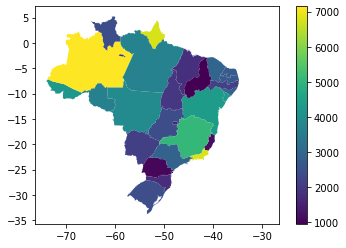

In [16]:
def visualize_text(df, text):
    text_df = df.query(f'causa_basica == "{text}"') # filtra o nome escolhido
    text_df = text_df.groupby('sigla_uf', as_index=False).sum() # agrupa pelos estados
    text_df.sigla_uf = text_df.sigla_uf.apply(lambda x: state2abbr[x]) # abrevia os estados
    text_df = text_df.rename(columns={'sigla_uf': 'HASC_1'}) # renomeia a coluna

    fig, ax = plt.subplots(1, 1)
    br_map = gpd.read_file('gadm36_BRA_1.shp') # lê o mapa
    br_map = br_map.merge(text_df, on='HASC_1', how='outer') # une o mapa com os dados
    br_map.plot(column='freq_per_100k', ax=ax, legend=True) # desenha o gráfico

visualize_text(df, 'R99')